

Датасет `data.csv` містить дані про студентів та підсумкові семестрові оцінки. 

Цільовою змінною є "GRADE" -- це підсумкова оцінка за семестр (мінімальне значення 0, максимальне 20)

Файл `attributes.csv` містить повні назви ознак.

Датасет `predict.csv` не містить оцінок і призначений для зовнішнього оцінювання. 













In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import ipywidgets as widgets
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Завдання 1

[3 бали] 

Імпортувати датасет `data.csv` у об'єкт `DataFrame` і провести попередній аналіз даних засобами `pandas`, `matplotlib`, `seaborn`.  

In [3]:
DataFrame = pd.read_csv("data.csv")
DataFrame 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,GRADE
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,2.208274,9
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,16
941,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,2.091864,7
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,10


In [4]:
DataFrame.shape

(944, 32)

In [5]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

Отже, маємо 944 об'єкта, 31 ознаку і цільову змінну. Немає жодного null значення. Подивимось на опис кожної ознаки:

In [6]:
#Зауваження: Для роботи віджету поле потрібно перезапустити (не загрузиться автоматично при відкритті файлу)
def get_describe(column):
    return DataFrame[column].describe()
widgets.interact(get_describe, column=widgets.Dropdown(options=DataFrame.columns, description="Column:"))

interactive(children=(Dropdown(description='Column:', options=('school', 'sex', 'age', 'address', 'famsize', '…

<function __main__.get_describe(column)>

Розподіл значень цільової змінної (для кожної з 2 шкіл):

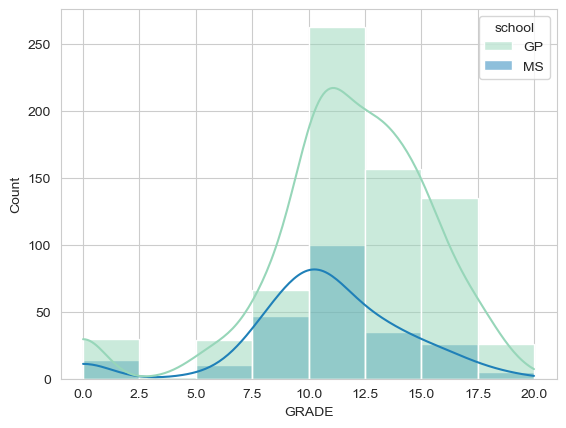

In [7]:
#sns.histplot(data = DataFrame, x = "GRADE", kde=True, bins=8, hue="school", multiple="dodge", shrink=.8, palette="YlGnBu")
sns.histplot(data = DataFrame, x = "GRADE", kde=True, bins=8, hue="school", palette="YlGnBu")
plt.show()

Бачимо, що є учні, які мають нетипово малу оцінку (outlier). Для повнішої інформаціії розглянемо boxplot, який базується на медіані і тому менш чутливий до викидів.

<AxesSubplot:xlabel='GRADE'>

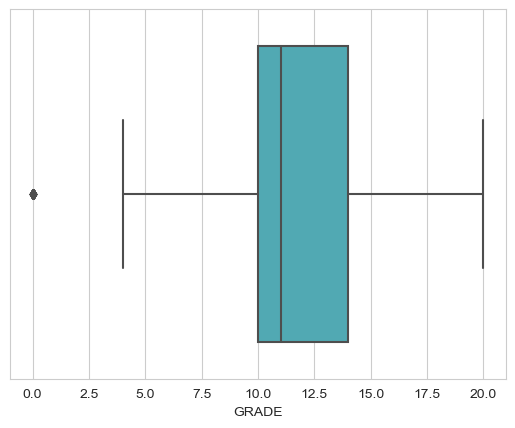

In [8]:
sns.boxplot(x=DataFrame["GRADE"], palette="YlGnBu")

Залежність цільової змінної від часу навчання (окремо для жінок і чоловіків)

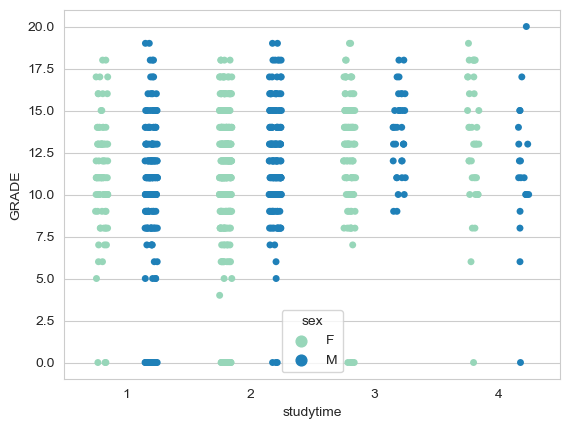

In [9]:
sns.stripplot(data=DataFrame, x="studytime", y="GRADE", hue="sex", dodge=True, palette="YlGnBu")
plt.show()

Подивимося на середнє значення  і відхилення для цільової змінної в залежності від рівня освіти батьків

In [10]:
edu = DataFrame.groupby(["Medu", "Fedu"])["GRADE"].agg(["mean", "std", "count"])
edu

mean       std  count
Medu Fedu                            
0    0     11.000000       NaN      1
     1     10.000000  1.000000      3
     2     13.600000  1.949359      5
1    0     14.250000  3.500000      4
     1     10.027523  3.767450    109
     2     10.723404  3.268440     47
     3      9.230769  3.192539     13
     4     10.666667  2.516611      3
2    1     10.608108  4.137425     74
     2     11.155039  3.352820    129
     3     11.540541  3.184987     37
     4     12.692308  3.146019     13
3    1     11.545455  3.767384     33
     2     11.283582  4.457904     67
     3     11.333333  3.098387     81
     4     11.361111  4.504936     36
4    0     10.500000  0.707107      2
     1     10.777778  2.386304      9
     2     13.000000  4.629100     43
     3     12.592593  3.642725     81
     4     12.564935  3.679879    154

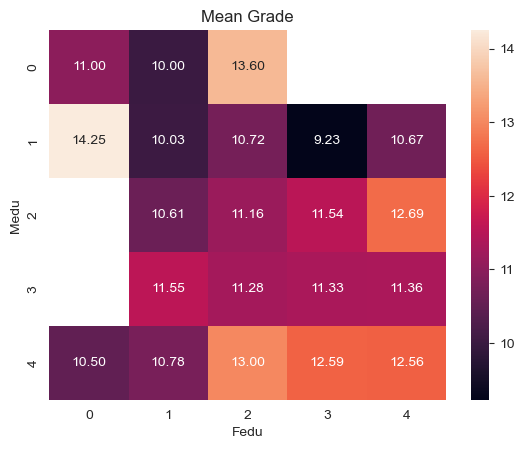

In [11]:
sns.heatmap(edu.drop(columns=["count", "std"]).reset_index().pivot(index="Medu", columns="Fedu", values="mean"), annot=True, fmt=".2f")
plt.title("Mean Grade")
plt.show()

Знайдемо ознаки найбільш лінійно пов'язані з цільовою змінною за допомогою коефіцієнту кореляції Пірсона

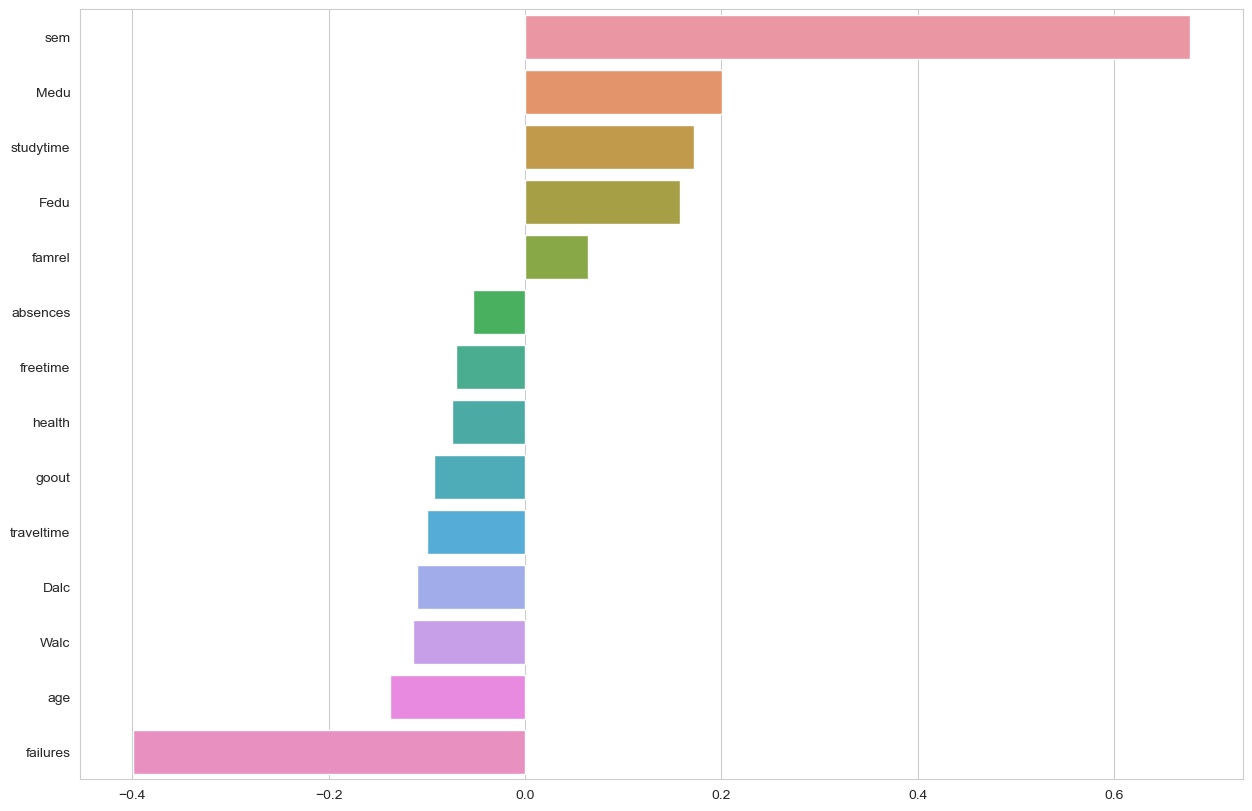

In [12]:
numeric_data = DataFrame.drop(columns=["GRADE"]).select_dtypes([np.number])
numeric_features = numeric_data.columns

correlations = DataFrame.drop(columns=["GRADE"])[numeric_features].corrwith(DataFrame["GRADE"]).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

Подивимось на графік цільової змінної від найбільш лінійно пов'язаної ознаки

<AxesSubplot:xlabel='sem', ylabel='GRADE'>

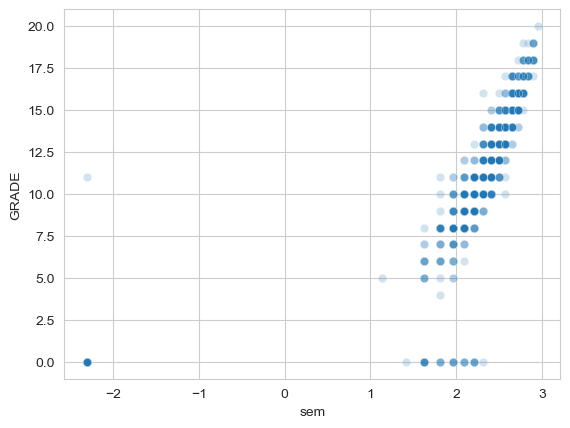

In [13]:
sns.scatterplot(x=DataFrame.drop(columns=["GRADE"])["sem"], y=DataFrame["GRADE"], alpha = 0.2)

Побудуємо також boxplot цієї ознаки

<AxesSubplot:xlabel='sem'>

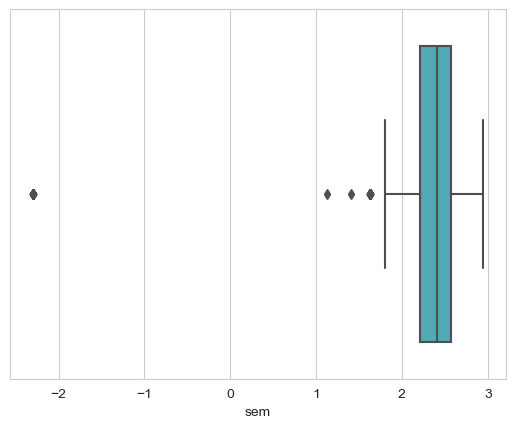

In [14]:
sns.boxplot(x=DataFrame["sem"], palette="YlGnBu")

Бачимо, що є аномальні значення, які суперечать логіці ознаки (від'ємна оцінка на проміжному тесті). Замінимо від'ємні значення ознаки на 0, вважаючи 0 найгіршою можливою оцінкою.

In [15]:
DataFrame["sem"] = DataFrame["sem"].map(lambda sem: 0 if sem < 0 else sem)

Додатково можемо подивитись на кореляцію між іншими числовими ознаками

<AxesSubplot:>

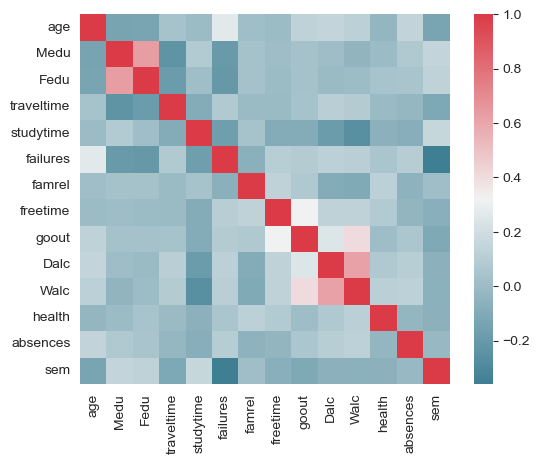

In [16]:
corr = DataFrame.drop(columns=["GRADE"]).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

Як бачимо, в основному вони незалежні (як і передбачає регресія), але деякі з них все ж пов'язані, що може влинути на результати.

## Завдання 2

[3 бали] 

Навчити модель лінійної регресії (`sklearn.linear_model.LinearRegression`) лише за числовими ознаками. 

Розглянути також варіанти з регуляризацією (`Ridge`, `Lasso`). Знайти оптимальні параметри регуляризації (`alpha`) за допомогою процедури крос-валідації.

Для всіх моделей знайти коефіцієнт детермінації на відкладеній вибірці.

Зробити висновки.

Поділимо дані на навчальну та тестову вибірки

In [17]:
from sklearn.model_selection import train_test_split
y = DataFrame["GRADE"]
X = DataFrame.drop(columns=["GRADE"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

Навчимо модель лінійної регресії лише за числовими ознаками. Використаємо різні моделі навчання.

In [18]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error

def output(model, y_pred, y_train_pred):
    global X_train, X_test, y_train, y_test
    print("-"*10 + f"{model}" + "-"*10)
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
    print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
    print(f"Test R2: {round(r2_score(y_test, y_pred), 4)}")
    print(f"Train R2: {round(r2_score(y_train, y_train_pred), 4)}")

models = [LinearRegression(),Ridge(), Lasso(), ElasticNet()]
for model in models:
    model.fit(X_train[numeric_features], y_train)
    y_pred = model.predict(X_test[numeric_features])
    y_train_pred = model.predict(X_train[numeric_features])
    output(model, y_pred, y_train_pred)


----------LinearRegression()----------
Test RMSE = 1.9725
Train RMSE = 2.1772
Test R2: 0.7156
Train R2: 0.6769
----------Ridge()----------
Test RMSE = 1.9727
Train RMSE = 2.1773
Test R2: 0.7156
Train R2: 0.6768
----------Lasso()----------
Test RMSE = 3.1395
Train RMSE = 3.2932
Test R2: 0.2796
Train R2: 0.2607
----------ElasticNet()----------
Test RMSE = 3.2006
Train RMSE = 3.3552
Test R2: 0.2513
Train R2: 0.2326


Проведемо скейлинг ознак для покращення результатів моделей, які використовують регуляризацію

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

Підберемо найкращі параметри регуляризації методом кросс-валідації

In [20]:
#Приклад процесу кросс-валідації для моделі Ridge
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 2.1063
	1.7165
	2.3870
	2.3497
	1.4950
	1.9593
	2.7178
	2.0223
	2.1865
	3.0352
Mean CV RMSE = 2.1976


Підберемо найкращі параметри для кожної моделі, що застосовує регуляризацію

Best alpha for model Ridge(alpha=10.722672220103231): 10.722672220103231
Best alpha for model Lasso(alpha=0.05722367659350217): 0.05722367659350217
Best alpha for model ElasticNet(alpha=0.04534878508128582): 0.04534878508128582


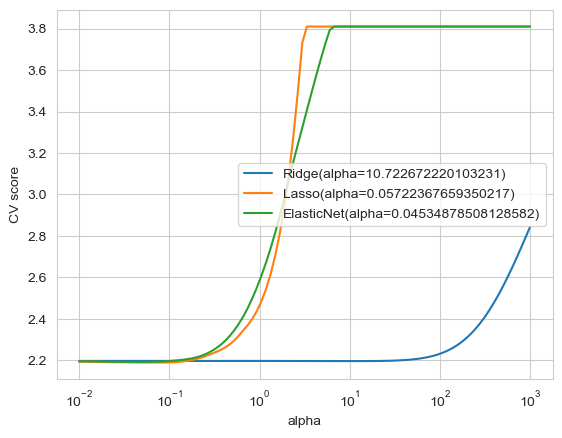

In [21]:
alphas = np.logspace(-2, 3, 100)
for model in models[1:]:
    min_score = np.inf
    cv_results=[]
    for alpha in alphas:
        cv_scores = cross_val_score(model.set_params(alpha= alpha), X_train_scaled, y_train, cv=10, scoring="neg_root_mean_squared_error")
        if np.mean(-cv_scores) < min_score:
            best_alpha = alpha
            min_score = np.mean(-cv_scores)
        plt.plot(alpha, np.mean(-cv_scores))
        cv_results.append(np.mean(-cv_scores))
    model.set_params(alpha=best_alpha)
    print(f"Best alpha for model {model}: {best_alpha}")
    plt.plot(alphas, cv_results, label=f"{model}")
    plt.xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("CV score")
    plt.legend()
plt.show()
    
     

Подивимось на результати навчання з найкращими параметрами

In [22]:
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_train_pred = model.predict(X_train_scaled)
    output(model, y_pred, y_train_pred)


----------LinearRegression()----------
Test RMSE = 1.9725
Train RMSE = 2.1772
Test R2: 0.7156
Train R2: 0.6769
----------Ridge(alpha=10.722672220103231)----------
Test RMSE = 1.9721
Train RMSE = 2.1777
Test R2: 0.7157
Train R2: 0.6767
----------Lasso(alpha=0.05722367659350217)----------
Test RMSE = 1.9572
Train RMSE = 2.1839
Test R2: 0.72
Train R2: 0.6749
----------ElasticNet(alpha=0.04534878508128582)----------
Test RMSE = 1.9665
Train RMSE = 2.1803
Test R2: 0.7173
Train R2: 0.6759


##### Висновок
Після нормалізації та пошуку найкращих параметрів результати моделей `Lasso` та `ElasticNet` значно покращились (адже, як можна побачити на графіку результатів крос-валідації, cv_score цих моделей для оптимального alpha значно відрізняється від cv_score для значення за замовчуванням).
Результати ж моделі `Ridge` не змінились (знайдене оптимальне альфа дає найкращі результати при крос-валідації, але оскільки вони незначно відрізняються від результатів для alpha=1, то впливу на результат на повній навчальній/тестовій вибірці не було)

Бачимо, що результати навчання усіх моделей за числовими ознаками близькі. Найкращі результати на тестовій вибірці показує модель `Lasso`, що використовує $L_1$ регуляризацію.



Додатково можемо спробувати логарифмувати цільову змінну. Це може покращити навчання за ознаками, від яких цільова змінна залежить нелінійно

In [23]:
y_train = y_train.replace(0, 0.1)
y_train_log = np.log(y_train)
for model in models:
    model.fit(X_train_scaled, y_train_log)
    y_pred = np.exp(model.predict(X_test_scaled))
    y_train_pred = np.exp(model.predict(X_train_scaled))
    output(model, y_pred, y_train_pred)
y_train = y_train.replace(0.1, 0)

----------LinearRegression()----------
Test RMSE = 3.4079
Train RMSE = 3.2955
Test R2: 0.1512
Train R2: 0.2539
----------Ridge(alpha=10.722672220103231)----------
Test RMSE = 3.3225
Train RMSE = 3.2182
Test R2: 0.1931
Train R2: 0.2885
----------Lasso(alpha=0.05722367659350217)----------
Test RMSE = 2.4548
Train RMSE = 2.5444
Test R2: 0.5595
Train R2: 0.5552
----------ElasticNet(alpha=0.04534878508128582)----------
Test RMSE = 2.7906
Train RMSE = 2.8285
Test R2: 0.4308
Train R2: 0.4503


##### Висновок
Бачимо, що результати погіршились. Спробувавши такий метод декілька разів на різних етапах роботи з різними складами ознак, можу зробити висновок, що він є нестабільний (це пов'язано з тим, що цільова змінна не змінюється експоненційно при зміні ознак), тому надалі не будемо використовувати його для навчання наших моделей.

Спробуємо змінити склад ознак за допомогою `PolynomialFeatures` (Генерує нову матрицю ознак, що складається з лінійної комбінації ознак об'єкта до певного степеня)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False)
X_train_preprocessed = pol.fit_transform(X_train_scaled)
X_test_preprocessed = pol.transform(X_test_scaled)

Зразу підберемо найкращі параметри з `PolynomialFeatures` для моделей з регуляризацією

Best alpha for model Ridge(alpha=34.30469286314919): 34.30469286314919
Best alpha for model Lasso(alpha=0.1291549665014884): 0.1291549665014884
Best alpha for model ElasticNet(alpha=0.11497569953977356): 0.11497569953977356


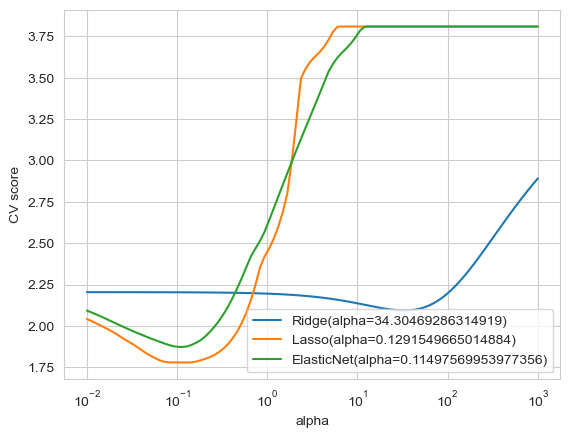

In [25]:
alphas = np.logspace(-2, 3, 100)
for model in models[1:]:
    min_scores = np.inf
    cv_results=[]
    for alpha in alphas:
        cv_scores = cross_val_score(model.set_params(alpha= alpha), X_train_preprocessed, y_train, cv=10, scoring="neg_root_mean_squared_error")
        if np.mean(-cv_scores) < min_scores:
            best_alpha = alpha
            min_scores = np.mean(-cv_scores)
        plt.plot(alpha, np.mean(-cv_scores))
        cv_results.append(np.mean(-cv_scores))
    model.set_params(alpha=best_alpha)
    print(f"Best alpha for model {model}: {best_alpha}")
    plt.plot(alphas, cv_results, label=f"{model}")
    plt.xscale("log")
    plt.xlabel("alpha")
    plt.ylabel("CV score")
    plt.legend()
plt.show()
    
     

In [26]:
for model in models:
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    y_train_pred = model.predict(X_train_preprocessed)
    output(model, y_pred, y_train_pred)


----------LinearRegression()----------
Test RMSE = 1.8793
Train RMSE = 1.5412
Test R2: 0.7419
Train R2: 0.8381
----------Ridge(alpha=34.30469286314919)----------
Test RMSE = 1.7992
Train RMSE = 1.5974
Test R2: 0.7634
Train R2: 0.826
----------Lasso(alpha=0.1291549665014884)----------
Test RMSE = 1.5275
Train RMSE = 1.7602
Test R2: 0.8295
Train R2: 0.7888
----------ElasticNet(alpha=0.11497569953977356)----------
Test RMSE = 1.6055
Train RMSE = 1.7206
Test R2: 0.8116
Train R2: 0.7982


##### Висновок.
Використання `PolynomialFeatures` для утворення нових ознак і зв'язків значно покращило результати всіх моделей.

Найкращою моделлю на числових ознаках залишилась модель `Lasso`, для навчання якої ми використали скейлинг і поліноміальні ознаки, підібрали найкращий гіперпараметр `alpha`, а також замінили аномальні значення ознаки sem.

In [27]:
best_numeric_model = models[2]

Також можемо подивитись на ваги кожної числової ознаки для наших моделей навчання

In [28]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

In [29]:
#Зауваження: Для роботи віджету поле потрібно перезапустити (не загрузиться автоматично при відкритті файлу)
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
widgets.interact(lambda x: show_weights(numeric_features, x.coef_, scales), x=widgets.Dropdown(options=models, description="Model:"))

interactive(children=(Dropdown(description='Model:', options=(LinearRegression(), Ridge(alpha=34.3046928631491…

<function __main__.<lambda>(x)>

## Завдання 3

[5 балів] 

Навчити модель лінійної регресії з використанням усіх ознак (застосувати one-hot кодування, бінаризацію тощо до нечислових ознак).

* Спробувати `LinearRegression`, `Ridge`, `Lasso`, `SGDRegressor(loss='squared_error')`, експерементуючи з кількістю і складом ознак та  підбором основних гіперпараметрів. 
    * `alpha` для `Ridge` та `Lasso`
    * `penalty`, `alpha`, `learning_rate` для `SGDRegressor` за допомогою `GridSearchCV`
* Мета -- отримати якомога кращий результат. 
* Знайти коефіцієнт детермінації для найкращих моделей на відкладеній вибірці.


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Виділимо категорійні ознаки

In [31]:
categorical = X_train.dtypes[X_train.dtypes == "object"].index
X_train[categorical]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
773,GP,F,R,GT3,T,teacher,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,yes
340,GP,F,U,GT3,T,services,services,course,father,no,yes,no,no,no,yes,yes,no
851,GP,F,R,LE3,T,services,other,reputation,mother,no,yes,yes,no,yes,yes,no,no
278,GP,M,U,GT3,T,other,other,home,father,no,no,no,no,yes,no,yes,no
167,GP,F,U,GT3,T,health,health,reputation,mother,no,yes,no,no,yes,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,GP,F,U,GT3,T,at_home,other,course,mother,no,yes,no,no,yes,yes,yes,no
709,GP,M,U,LE3,T,services,services,reputation,father,no,yes,no,yes,yes,yes,yes,no
439,MS,F,R,GT3,T,other,other,course,father,no,yes,no,no,yes,no,yes,no
174,GP,F,U,GT3,T,services,other,reputation,mother,no,no,no,yes,no,yes,yes,no


Далі для навчання використовуватимемо клас `Pipeline`. Закодуємо категорійні ознаки методом `OneHot` кодування. Для числових ознак продовжуємо використовувати скейлинг.

In [32]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])
models = [LinearRegression(), Ridge(), Lasso(), SGDRegressor(loss='squared_error', shuffle=False)]
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])

    modelf = pipeline.fit(X_train, y_train)
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)

----------LinearRegression()----------
Test RMSE = 1.9848
Train RMSE = 2.1097
Test R2: 0.7121
Train R2: 0.6966
----------Ridge()----------
Test RMSE = 1.9840
Train RMSE = 2.1097
Test R2: 0.7123
Train R2: 0.6966
----------Lasso()----------
Test RMSE = 2.2458
Train RMSE = 2.4841
Test R2: 0.6313
Train R2: 0.5793
----------SGDRegressor(shuffle=False)----------
Test RMSE = 1.9912
Train RMSE = 2.1129
Test R2: 0.7102
Train R2: 0.6956


Знайдемо найкращий гіперпараметр `alpha` для моделей `Lasso` і `Ridge`

Best alpha for model Ridge() = 43.2876
Best alpha for model Lasso() = 0.0614


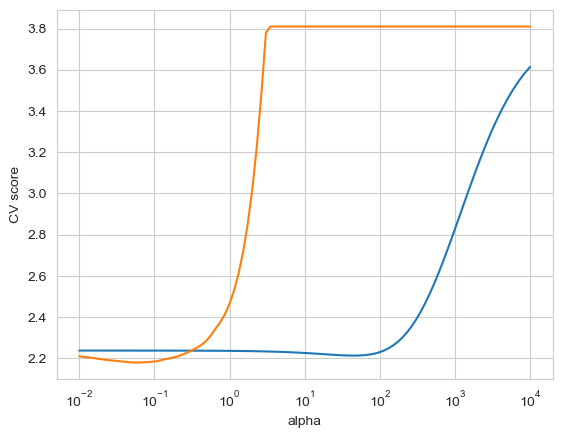

In [33]:
def get_best_alpha(pipeline, model, y_train, plot=False):
    alphas = np.logspace(-2, 4, 100)
    searcher = GridSearchCV(pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
    searcher.fit(X_train, y_train)

    best_alpha = searcher.best_params_["regression__alpha"]
    print(f"Best alpha for model {model} = %.4f" % best_alpha)
    model.set_params(alpha=best_alpha)
    if plot:
        plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
        plt.xscale("log")
        plt.xlabel("alpha")
        plt.ylabel("CV score")

    
for model in models[1:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])   
    get_best_alpha(pipeline, model, y_train, plot=True)

Підберемо найкращі параметри для моделі `SGDRegressor`

In [34]:
def get_best_params(pipeline, model, y_train):
    param_grid = {
        'regression__alpha': np.logspace(-2, 4, 100),
        'regression__penalty': ['l2', 'l1', 'elasticnet'],
        'regression__learning_rate': ['constant', 'optimal', 'invscaling'],
    }
    searcher = GridSearchCV(pipeline, [param_grid],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)
    searcher.fit(X_train, y_train)
    model.set_params(alpha = searcher.best_params_["regression__alpha"], learning_rate = searcher.best_params_["regression__learning_rate"], penalty = searcher.best_params_["regression__penalty"])
    
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', models[-1])
])
get_best_params(pipeline, models[-1], y_train)

Подивимось на результати навчання після підбору оптимальних параметрів

In [35]:
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])

    modelf = pipeline.fit(X_train, y_train)
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)

----------LinearRegression()----------
Test RMSE = 1.9848
Train RMSE = 2.1097
Test R2: 0.7121
Train R2: 0.6966
----------Ridge(alpha=43.287612810830616)----------
Test RMSE = 1.9796
Train RMSE = 2.1215
Test R2: 0.7136
Train R2: 0.6932
----------Lasso(alpha=0.06135907273413173)----------
Test RMSE = 1.9554
Train RMSE = 2.1582
Test R2: 0.7205
Train R2: 0.6825
----------SGDRegressor(alpha=0.12328467394420659, penalty='l1', shuffle=False)----------
Test RMSE = 1.9996
Train RMSE = 2.1671
Test R2: 0.7077
Train R2: 0.6798


Спробуємо вилучити об'єкти з великими значеннями похибки і провести навчання на отриманій навчальній вибірці

----------LinearRegression()----------
Test RMSE = 1.9240
Train RMSE = 2.1807
Test R2: 0.7294
Train R2: 0.6758
----------Ridge(alpha=43.287612810830616)----------
Test RMSE = 1.9137
Train RMSE = 2.1793
Test R2: 0.7323
Train R2: 0.6762
----------Lasso(alpha=0.06135907273413173)----------
Test RMSE = 1.9293
Train RMSE = 2.2212
Test R2: 0.7279
Train R2: 0.6637
----------SGDRegressor(alpha=0.12328467394420659, penalty='l1', shuffle=False)----------
Test RMSE = 1.9432
Train RMSE = 2.2075
Test R2: 0.724
Train R2: 0.6678


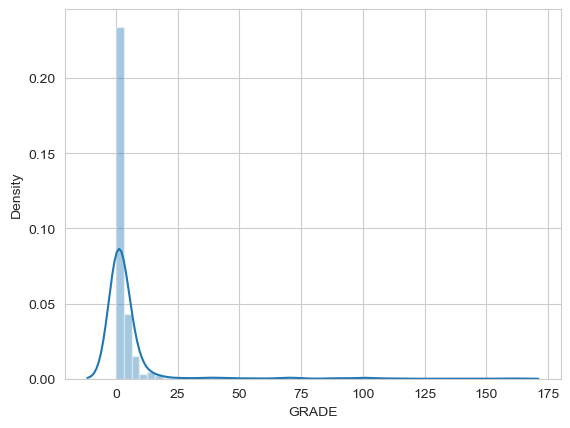

In [36]:
mask = {}
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    modelf = pipeline.fit(X_train, y_train)
    error = (y_train - modelf.predict(X_train)) ** 2
    if model == models[1]:
        sns.distplot(error)
    mask[model] = (error < np.quantile(error, 0.95))
    modelf = pipeline.fit(X_train[mask[model]], y_train[mask[model]])
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)
    

Як бачимо, результат незначно покращився. Це пов'язано з тим, що, як видно на гістограмі розподілу квадратичної помилки, є об'єкти з досить великим її значеннями, прибирання яких може позитивно вплинути на навчання моделі. 

Спробуємо використати бінаризацію для покращення результатів навчання

In [37]:
from sklearn.preprocessing import KBinsDiscretizer
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('binning', KBinsDiscretizer(n_bins=5, strategy='quantile'), numeric_features),
    ('scaling', StandardScaler(), numeric_features)
])
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    modelf = pipeline.fit(X_train, y_train)
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)

----------LinearRegression()----------
Test RMSE = 1.7605
Train RMSE = 1.7351
Test R2: 0.7735
Train R2: 0.7948
----------Ridge(alpha=43.287612810830616)----------
Test RMSE = 1.7330
Train RMSE = 1.8206
Test R2: 0.7805
Train R2: 0.774
----------Lasso(alpha=0.06135907273413173)----------
Test RMSE = 1.6783
Train RMSE = 1.8750
Test R2: 0.7941
Train R2: 0.7603
----------SGDRegressor(alpha=0.12328467394420659, penalty='l1', shuffle=False)----------
Test RMSE = 1.8229
Train RMSE = 2.0034
Test R2: 0.7571
Train R2: 0.7264


Ще раз підберемо найкращі параметри для кожної моделі з бінаризацією. Подивимось на результат

In [38]:
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    if model != models[0]:
        if model != models[3]:
            get_best_alpha(pipeline, model, y_train)
        else:
            get_best_params(pipeline, model, y_train)
    
    modelf = pipeline.fit(X_train, y_train)
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)

----------LinearRegression()----------
Test RMSE = 1.7605
Train RMSE = 1.7351
Test R2: 0.7735
Train R2: 0.7948
Best alpha for model Ridge(alpha=43.287612810830616) = 9.3260
----------Ridge(alpha=9.326033468832199)----------
Test RMSE = 1.7226
Train RMSE = 1.7517
Test R2: 0.7831
Train R2: 0.7908
Best alpha for model Lasso(alpha=0.06135907273413173) = 0.0305
----------Lasso(alpha=0.030538555088334154)----------
Test RMSE = 1.6832
Train RMSE = 1.8060
Test R2: 0.7929
Train R2: 0.7776
----------SGDRegressor(alpha=0.013219411484660288, penalty='l1', shuffle=False)----------
Test RMSE = 1.7315
Train RMSE = 1.7779
Test R2: 0.7809
Train R2: 0.7845


Переведемо деякі числові ознаки в категорійні (оскільки вони більше подібні на них)

In [39]:
DataFrame = DataFrame.astype({"Medu": "object", "Fedu": "object", "traveltime": "object", "studytime": "object", "famrel": "object",
                             "freetime":"object", "goout": "object", "Dalc":"object", "Walc":"object", "health": "object"})
y = DataFrame["GRADE"]
X = DataFrame.drop(columns=["GRADE"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)


numeric_data = X.select_dtypes([np.number])
numeric_features = numeric_data.columns
categorical = X_train.dtypes[X_train.dtypes == "object"].index

In [40]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
    ('scaling', StandardScaler(), numeric_features)
])
for model in models:
    binner = KBinsDiscretizer(n_bins=5, strategy='quantile')
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    modelf = pipeline.fit(X_train, y_train)
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)

----------LinearRegression()----------
Test RMSE = 1.6912
Train RMSE = 1.6972
Test R2: 0.791
Train R2: 0.8036
----------Ridge(alpha=9.326033468832199)----------
Test RMSE = 1.6500
Train RMSE = 1.7167
Test R2: 0.801
Train R2: 0.7991
----------Lasso(alpha=0.030538555088334154)----------
Test RMSE = 1.6056
Train RMSE = 1.7937
Test R2: 0.8116
Train R2: 0.7807
----------SGDRegressor(alpha=0.013219411484660288, penalty='l1', shuffle=False)----------
Test RMSE = 1.6543
Train RMSE = 1.7534
Test R2: 0.8
Train R2: 0.7904


Спробуємо використати `PolynomialFeatures` для преобробки даних. Візьмемо 2 степінь для зменшення ризику перенавчання.

In [41]:
from sklearn.preprocessing import PolynomialFeatures
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=True), numeric_features),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features)
])
for model in models[:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    if model in models[1:3]:
        get_best_alpha(pipeline, model, y_train)
    modelf = pipeline.fit(X_train, y_train)
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)



----------LinearRegression()----------
Test RMSE = 1.6643
Train RMSE = 1.5498
Test R2: 0.7976
Train R2: 0.8363
Best alpha for model Ridge(alpha=9.326033468832199) = 16.2975
----------Ridge(alpha=16.297508346206453)----------
Test RMSE = 1.5985
Train RMSE = 1.5814
Test R2: 0.8132
Train R2: 0.8295
Best alpha for model Lasso(alpha=0.030538555088334154) = 0.0351
----------Lasso(alpha=0.03511191734215131)----------
Test RMSE = 1.5593
Train RMSE = 1.6517
Test R2: 0.8223
Train R2: 0.814


Знову відкинемо об'єкти з великим значенням похибки при навчанні.

In [42]:
mask = {}
for model in models[:3]:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    modelf = pipeline.fit(X_train, y_train)
    error = (y_train - modelf.predict(X_train)) ** 2
    mask[model] = (error < np.quantile(error, 0.98))
    modelf = pipeline.fit(X_train[mask[model]], y_train[mask[model]])
    y_pred = modelf.predict(X_test)
    y_train_pred = modelf.predict(X_train)
    output(model, y_pred, y_train_pred)
    

----------LinearRegression()----------
Test RMSE = 1.5700
Train RMSE = 1.6782
Test R2: 0.8198
Train R2: 0.808
----------Ridge(alpha=16.297508346206453)----------
Test RMSE = 1.5512
Train RMSE = 1.7265
Test R2: 0.8241
Train R2: 0.7968
----------Lasso(alpha=0.03511191734215131)----------
Test RMSE = 1.5123
Train RMSE = 1.7679
Test R2: 0.8328
Train R2: 0.7869


#### Висновок
Після різних експериментів зі складом ознак і підбору гіперпараметрів для наших моделей навчання, найкращою моделлю, що розв'язує задачу лінійної регресії виявилась:
* `Lasso`, під час навчання якої ми використали `One-Hot` кодування, скейлинг, преобробку за допомогою `PolynomialFeatures`, бінаризацію, а також перевели деякі числові ознаки в категорійні і замінили аномальні значення ознаки `sem`.


In [43]:
best_model = models[2]

### Зробити висновки і обрати найкращу модель яка розв'язує задачу регресії. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів зберегти у файл `predictions_reg.csv`.


In [44]:
predict_sample = pd.read_csv("predict.csv").astype({"Medu": "object", "Fedu": "object", "traveltime": "object", "studytime": "object", "famrel": "object",
                             "freetime":"object", "goout": "object", "Dalc":"object", "Walc":"object", "health": "object"})

predict_sample["sem"] = predict_sample["sem"].map(lambda sem: 0 if sem < 0 else sem)

In [45]:
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', best_model)
])
modelf = pipeline.fit(X_train, y_train)
error = (y_train - modelf.predict(X_train)) ** 2
mask = (error < np.quantile(error, 0.98))
modelf = pipeline.fit(X_train[mask], y_train[mask])
y_train_pred = modelf.predict(X_train)
y_pred = modelf.predict(predict_sample)

In [46]:
# Зберегти прогнози у змінну best_reg_model_predictions
best_reg_model_predictions = y_pred

In [47]:
# Запустити для створення файлу
pd.Series(best_reg_model_predictions).to_csv('predictions_reg.csv')

### Завдання 4

[1 бал] 

Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `M1_Прізвище_Ім'я.ipynb`

Окремо додати файл `predictions_reg.csv`.


Додатково можна отримати до [4 балів] за порівняннями результатів найкращих моделей завданнь 2 та 3.